# (Ford GoBike System Data)
## by (Marwa Ibrahim Alalfi)

## Preliminary Wrangling

> This dataset contains trips data of the fordgo bike rental system. An initial exploration will be done and follow it with data cleaning phase in order to clearly visualize data and discover insights and trends.


# import all packages and set plots to be embedded inline


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [95]:
#load dataset 
df =pd.read_csv('bikeshare.csv')

In [96]:
df.shape

(183412, 16)

In [97]:
#show dataset structure & describe its properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [98]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Dataset structure 

> The dataset contains 183412 records with 16 features. 9 variables are numeric, 2 variables are timestamp and the remaining 7 variables are categorical
>
>   1-  Numeric variables:
>     
>duration_sec,    start_station_id,    start_station_latitude,    start_station_longitude,  end_station_id,    end_station_latitude,    end_station_longitude,    bike_id,    member_birth_year
>
>   2-  Timestamp variables :
>     
>start_time,    end_time 
>
>   3-  String:
>     
>start_station_name,    end_station_name
>
>   4-  Categorical variables:
>     
>user_type,    member_gender,    bike_share_for_all_trip
>

### Main feature of interest 

trip duration/hours , User Type, Member Year of Birth , Member Gender
 

### Other features in the dataset that will help support my investigation into your feature of interest

Start Time , End Time  and other features to be transformed from the current features 



In [99]:
#Removing unneeded columns from the dataset for better analysis
df.drop(['start_station_id','end_station_id','start_station_latitude','bike_id','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_name         183215 non-null object
end_station_name           183215 non-null object
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 12.6+ MB


In [100]:
#change the datatype or these 4 variables to be more realstic and help us manipulating the data well 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_name         183215 non-null object
end_station_name           183215 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 10.1+ MB


In [101]:
#change duration_sec to duration_min (duration in minutes) for mor clarification and understanding
df ['duration_sec'] = df['duration_sec']  / 60
df.rename(columns={"duration_sec": "duration_min"},inplace = True) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
duration_min               183412 non-null float64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_name         183215 non-null object
end_station_name           183215 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(2), object(3)
memory usage: 10.1+ MB


In [102]:
#check duplicate records
df.duplicated().sum()

0

In [103]:
#check null values 
df.isnull().sum()

duration_min                  0
start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

        - There are 197 null values with missing start and end station names. 197 is a few number according to the overall dataset records, so we will drop them. 

        - Varaibles member_birth_year & member_gender have also null values and can not be filled. So, it's ok to keep them because this will be handled by plotting a third category called nulls or others. 

In [104]:
#check the null start and end station names and match them to check for equality
null_index = df[df['start_station_name'].isnull()].index
null_index2 = df[df['end_station_name'].isnull()].index 
null_index == null_index2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [105]:
#since both null_index and null_index2 are the same records so we drop only one index from them 
df.drop(index = null_index , axis=0,inplace=True)
df.isnull().sum()

duration_min                  0
start_time                    0
end_time                      0
start_station_name            0
end_station_name              0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [106]:
df.describe()

,duration_min,member_birth_year
count,183215.000000,174952.000000
mean,12.098367,1984.803135
std,29.917978,10.118731
min,1.016667,1878.000000
25%,5.416667,1980.000000
50%,8.566667,1987.000000
75%,13.266667,1992.000000
max,1424.066667,2001.000000


    - member_birth_year & duration_min variables seem that they have some outliers and needs more investigations to be done below

In [107]:
#drop the age outlier age = 140 
min_age = df.loc[df['member_birth_year']  == 1878].index
df.drop(min_age , axis=0, inplace=True)

In [108]:
df.loc[df['member_birth_year']  == 1878]

,duration_min,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [109]:
# member_birth_year investigation 
df['member_birth_year'].unique()

array([ 1984.,    nan,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,
        1992.,  1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,
        1997.,  1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,
        1971.,  1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,
        1969.,  1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,
        1962.,  1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,
        1900.,  1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,
        1955.,  1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,
        2001.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,  1902.,
        1910.,  1938.,  1927.])

In [110]:
ages = 2020 - df['member_birth_year']
(ages.sort_values(ascending=True)).unique()

array([  19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   81.,   82.,
         86.,   87.,   89.,   90.,   92.,   93.,  100.,  110.,  118.,
        119.,  120.,   nan])

In [111]:
#explore more about ages categories in order to create ages groups that will help more in visualization
ages.isnull().sum()


8263

In [112]:
#checking the count to decide whether there are other incorrect data 
print (" ages   < 18 :  "  ,(  ages<18                ).sum() )
print (" ages 18 - 35:  "  ,( (ages>=18) & (ages< 35) ).sum())
print (" ages 35 - 50:  "  ,( (ages>=35) & (ages<50)  ).sum())
print (" ages 50 - 65:  "  ,( (ages>=50) & (ages<65)  ).sum())
print (" ages 65 - 80:  "  ,( (ages>=65) & (ages<80)  ).sum())
print (" ages 80 - 100: "  ,( (ages>=80) & (ages<100) ).sum())
print (" ages   > 100 :  "  ,(ages>100).sum() )

 ages   < 18 :   0
 ages 18 - 35:   100444
 ages 35 - 50:   56651
 ages 50 - 65:   16043
 ages 65 - 80:   1611
 ages 80 - 100:  128
 ages   > 100 :   71


In [113]:
#df.loc[((ages> 100) )]

      - Concerning the people who are above 100 years, these 71 records I can't make sure if these data are considered 
      as outliers because sometimes people could live until 120 years.I decided to keep them and classify the age into 
      groups for better and clear visualization. 

In [114]:
#create column age with numeric age value in years 
df['age'] = 2020 - df['member_birth_year']

#create age groups for better classification 
bins= [18, 35 ,50 ,65 ,80,100,140]
labels = ['[18-35]', '[35-50]','[50-65]','[65-80]','[80-100]','[above 100]' ] 
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [115]:
df.drop(['member_birth_year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183214 entries, 0 to 183411
Data columns (total 10 columns):
duration_min               183214 non-null float64
start_time                 183214 non-null datetime64[ns]
end_time                   183214 non-null datetime64[ns]
start_station_name         183214 non-null object
end_station_name           183214 non-null object
user_type                  183214 non-null category
member_gender              174951 non-null category
bike_share_for_all_trip    183214 non-null object
age                        174951 non-null float64
age_group                  174951 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), object(3)
memory usage: 11.7+ MB


In [116]:
df['start_hour'] =df['start_time'].dt.hour 
df['end_hour'] = df['end_time'].dt.hour 

In [79]:
#start_time    end_time                   
df.head()

,duration_min,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,age_group,start_hour,end_hour
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,36.0,[35-50],17,8
1,708.683333,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,No,NaN,NaN,18,6
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,48.0,[35-50],12,5
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,31.0,[18-35],17,4
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,46.0,[35-50],23,0


In [122]:
df.to_csv('bike_mod.csv', index=False )

## Univariate Exploration


In [124]:
df.columns

Index(['duration_min', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'age', 'age_group', 'start_hour',
       'end_hour'],
      dtype='object')

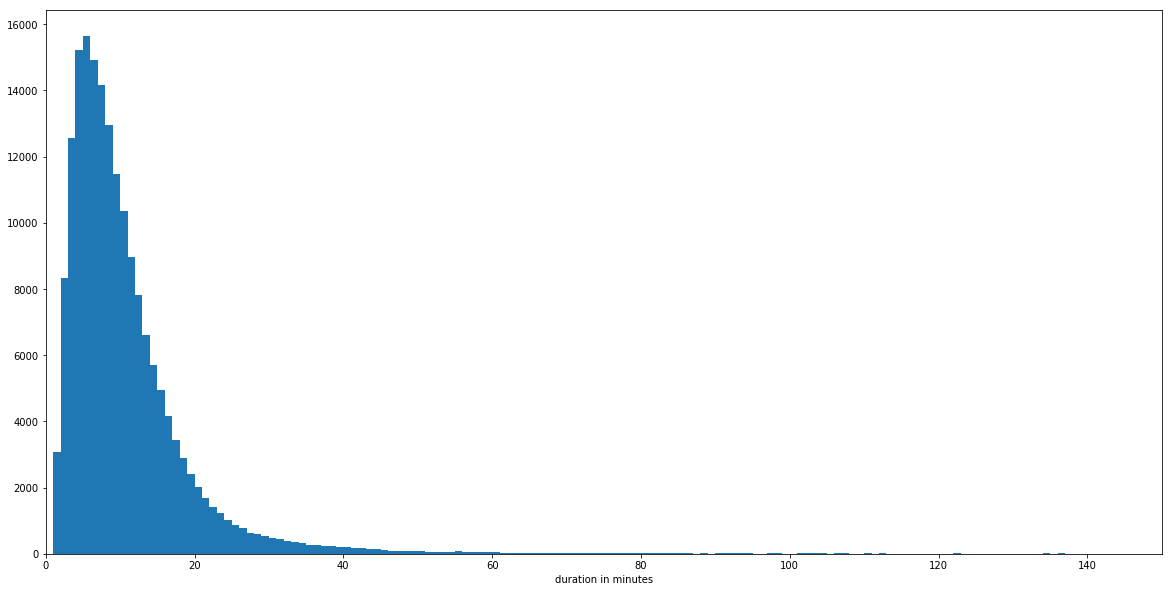

In [126]:
#create bins / then plot a histogramof trip duration in minutes 
plt.figure(figsize=[20, 10])

binsize = 1
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.hist(data = df, x = df['duration_min'] , bins = bins )
 
plt.xlabel('duration in minutes')
plt.xlim((0,150));
plt.show()

    - This histogram shows that more than 140000 bike trips were held with an average trip duration of 12 minutes 


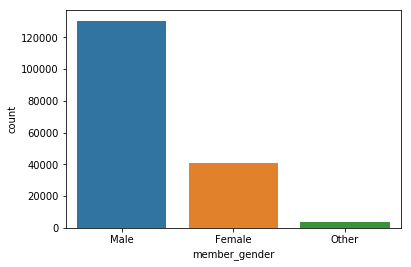

In [83]:
#get the count of member gender / index of count then plot a horizontal bar chart
freq1 = df['member_gender'].value_counts()
gen_order1 = freq1.index
sb.countplot(data=df, x='member_gender',  order=gen_order1)
 

    - It's very obvious from the figure above is that Males is thrice the females
   
    - Males are more often using this bikeshare service 

(-1.1064844320103164,
 1.1985566007074397,
 -1.1059747502950703,
 1.1990662824226859)

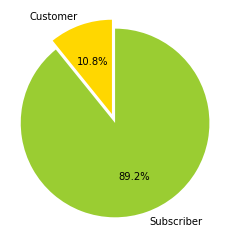

In [89]:
#get the count of user types / index of count then plot a pie plot  
colors = [  'yellowgreen','gold']
sorted_counts = df['user_type'].value_counts()
explode = (0 , 0.1) 
plt.pie(sorted_counts, labels = sorted_counts.index,explode =explode , startangle = 90, autopct='%1.1f%%', counterclock = False, colors = colors );
plt.axis('square')

    - This figure shows that  89% of  Ford GoBike users are  subscribers
    
    - Subsribers are approximately 8 times more than customers 

(-1.1073105077186975,
 1.2035919327256404,
 -1.1102522589599717,
 1.2006501814843662)

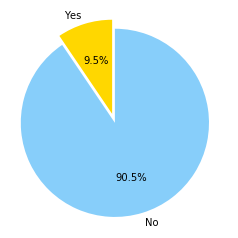

In [88]:
#get the count of bike_share_for_all_trip / index of count then plot a pie plot  
colors_list = [ 'lightskyblue','gold']
sorted_counts1 = df['bike_share_for_all_trip'].value_counts()
explode = (0 , 0.1) 
plt.pie(sorted_counts1, labels = sorted_counts1.index, explode =explode , startangle = 90, autopct='%1.1f%%', counterclock = False,colors=colors_list);
plt.axis('square')

        - This figures shows that 9.5 % of the overall users are members who are enrolled in the Bike Share for All 
          (program for low-income residents)



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Yes, some outliers are detected and transformations are performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, I had to do some cleaning ,data wrangling and some operations before working.
        - converting variables types to the appropriate data types
        - dropping unneeded columns 
        - dropping null records
        - duration in seconds is changed to duration in minutes for better visualization  
        - member birth year has outliers   
        - Age groups are created for better classification and visualization
        - extract hour from start time / end time


## Bivariate Exploration



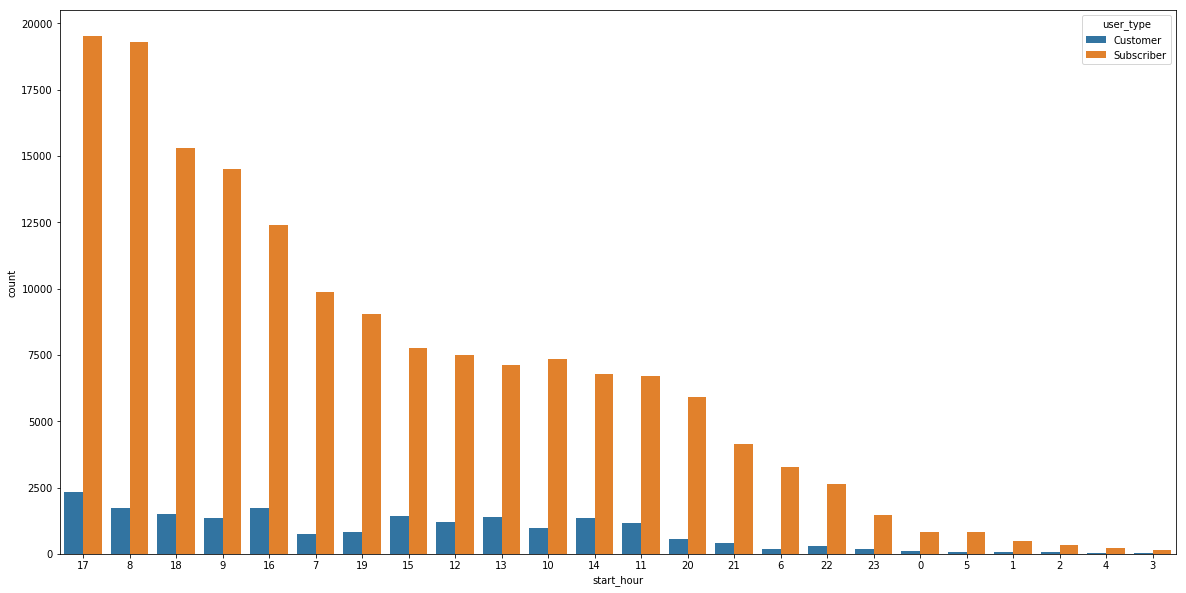

In [41]:
#get the count of user_type in each start_hour then plot a horizontal bar chart
plt.figure(figsize=[20, 10])
freq3 = df['start_hour'].value_counts()
gen_order3 = freq3.index
sb.countplot(data=df, x='start_hour', hue ='user_type' , order=gen_order3);
 

     - This plot shows that the peak hour for all users ( subscriber - customer ) is 5 pm and 8 am 

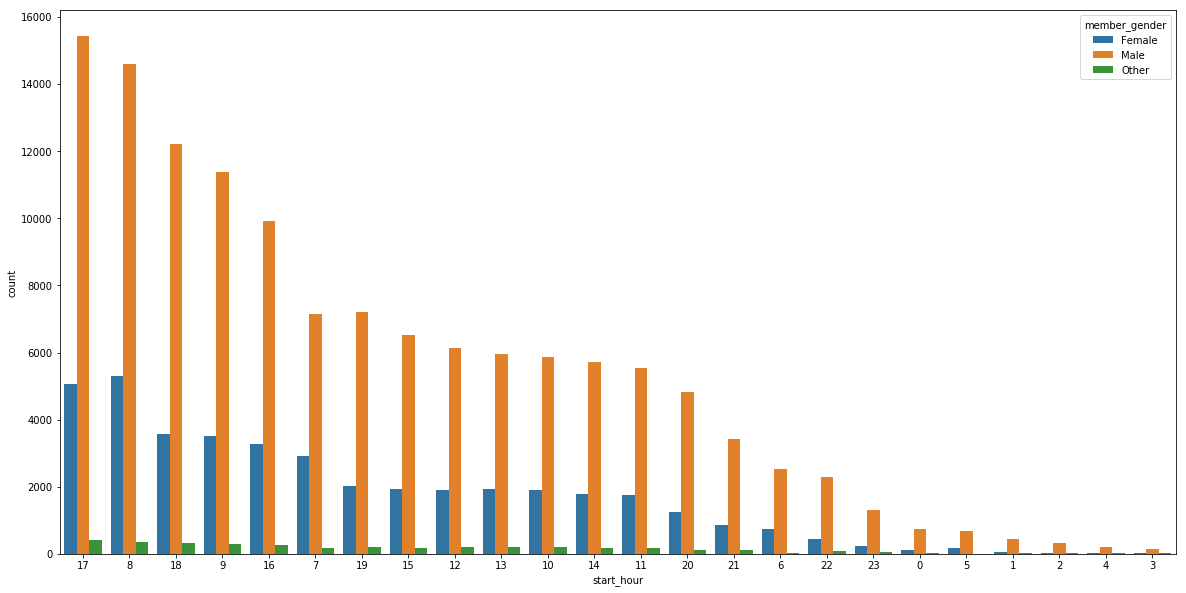

In [42]:
#get the count of member gender in each start_hour then plot a horizontal bar chart
plt.figure(figsize=[20, 10])
freq4 = df['start_hour'].value_counts()
gen_order4 = freq4.index
sb.countplot(data=df, x='start_hour', hue ='member_gender' , order=gen_order4 );
 

    - peak hour for male riders is 5 pm 
    
    - peak hour for female riders is 8 am 


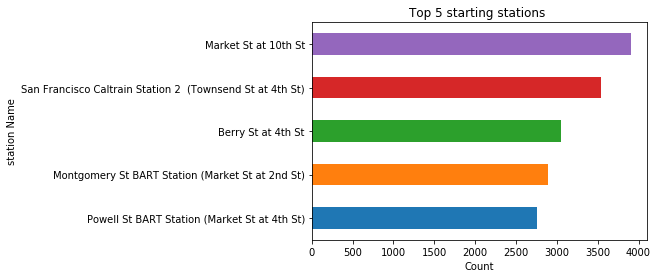

In [44]:
#top most frequent start stations
start = df.start_station_name.value_counts()[0:5].sort_values()
start.plot(kind = 'barh')
plt.title('Top 5 starting stations ')
plt.xlabel('Count')
plt.ylabel('station Name');

    - Top most frequent start stations

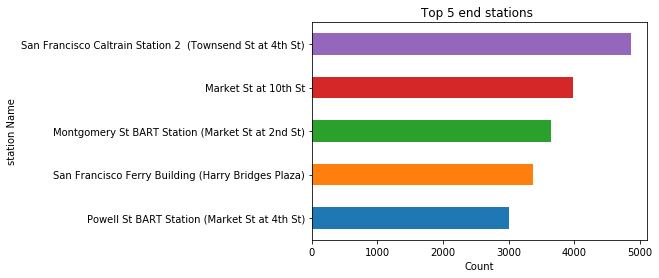

In [33]:
#top most frequent end stations
end = df.end_station_name.value_counts()[0:5].sort_values()
end.plot(kind = 'barh')
plt.title('Top 5 end stations ')
plt.xlabel('Count')
plt.ylabel('station Name');

    - Top most frequent end stations

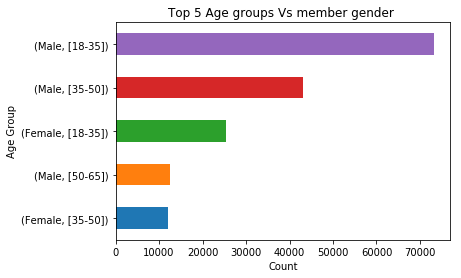

In [34]:
#Top 5 Age groups Vs member gender   
group = df.groupby(['member_gender'])['age_group'].value_counts().sort_values()
group[13:].plot(kind = 'barh' ,stacked=True)
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Top 5 Age groups Vs member gender ');
 



    - This figure shows the Male Adults (age from 18- 35) & (age from 35-50) are the top bikeshare users 
    
    - Females Adults (age from 18- 35) achieved the third rank.
    
    - Overall conclusion:  Males are the most frequesnt users of  GoFord Bike share service



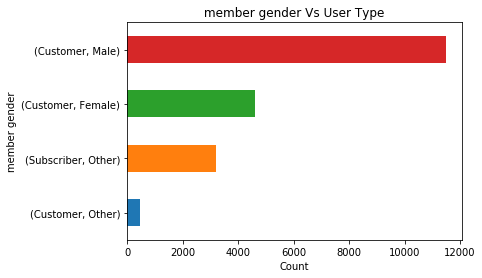

In [35]:
# member gender Vs User Type
group2 = df.groupby(['user_type'])['member_gender'].value_counts().sort_values()
group2[0:4].plot(kind = 'barh' ,stacked=True)
plt.xlabel('Count')
plt.ylabel('member gender')
plt.title(' member gender Vs User Type ');

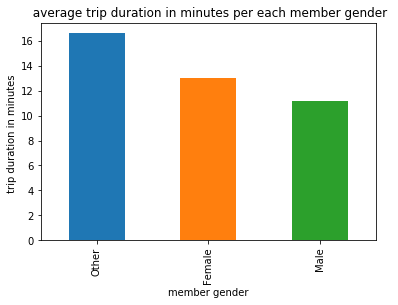

In [36]:
# member gender Vs trip duration_min
freq5 =df.groupby(['member_gender'])['duration_min'].mean().sort_values(ascending = False) 
freq5[0:4].plot(kind = 'bar')
plt.xlabel('member gender')
plt.ylabel(' trip duration in minutes  ')
plt.title('  average trip duration in minutes per each member gender ');

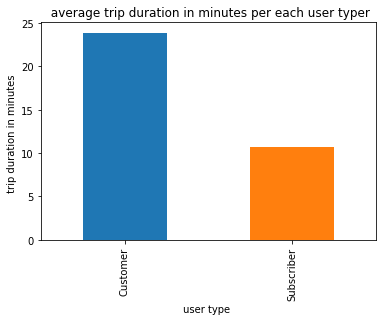

In [37]:
# user type Vs User Type
freq6 = df.groupby(['user_type'])['duration_min'].mean().sort_values(ascending = False)
 
freq6.plot(kind = 'bar')
plt.xlabel('user type ')
plt.ylabel(' trip duration in minutes  ')
plt.title('  average trip duration in minutes per each user typer ');

    - subscribers are more often using bike share service for short duration trips

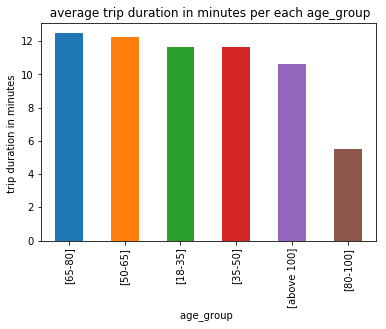

In [38]:
# age group Vs duration_min
freq7 = df.groupby(['age_group'])['duration_min'].mean().sort_values(ascending = False)
 
freq7.plot(kind = 'bar')
plt.xlabel('age_group ')
plt.ylabel(' trip duration in minutes  ')
plt.title('  average trip duration in minutes per each age_group ');

## Multivariate Exploration



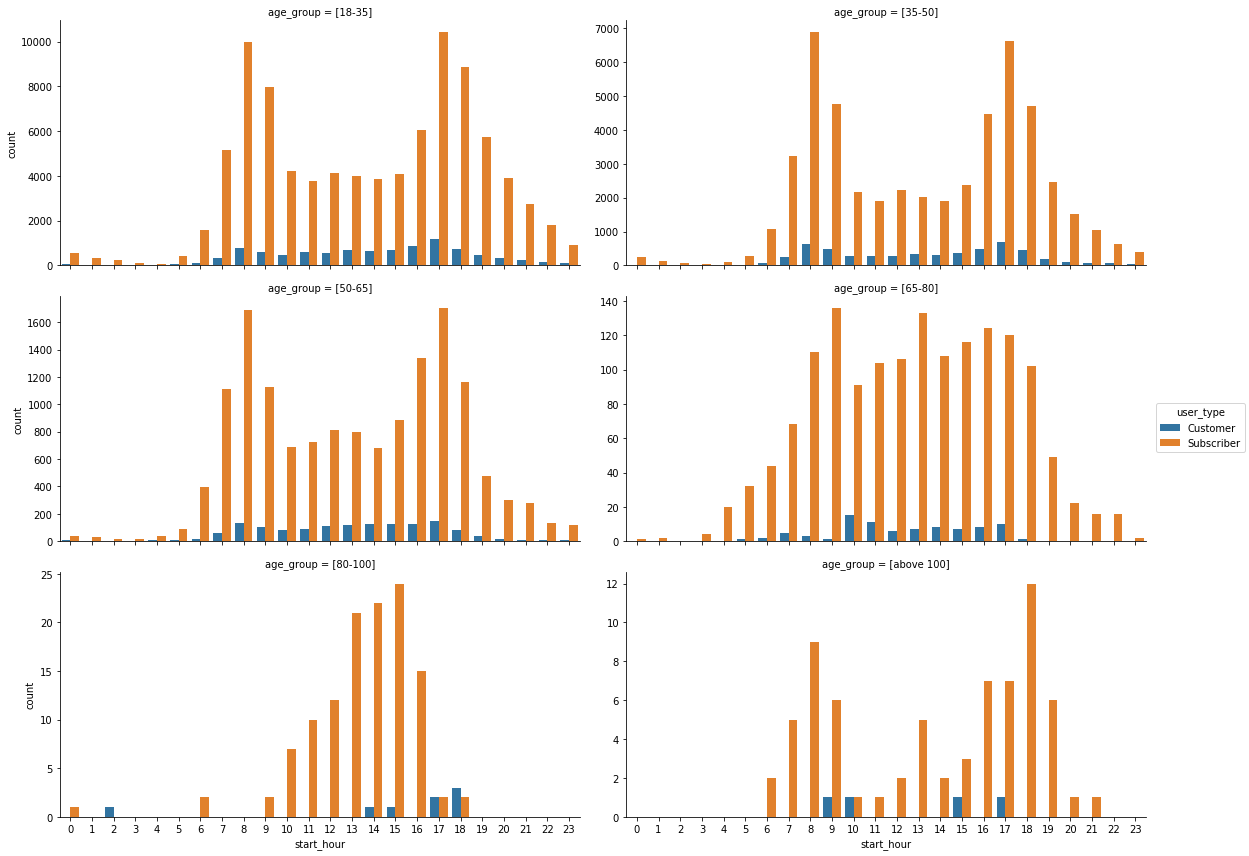

In [52]:
 sb.factorplot(data=df ,x='start_hour',col='age_group',hue='user_type',sharey= False ,col_wrap= 2 ,aspect=2
              ,kind ='count',legend_out=True);

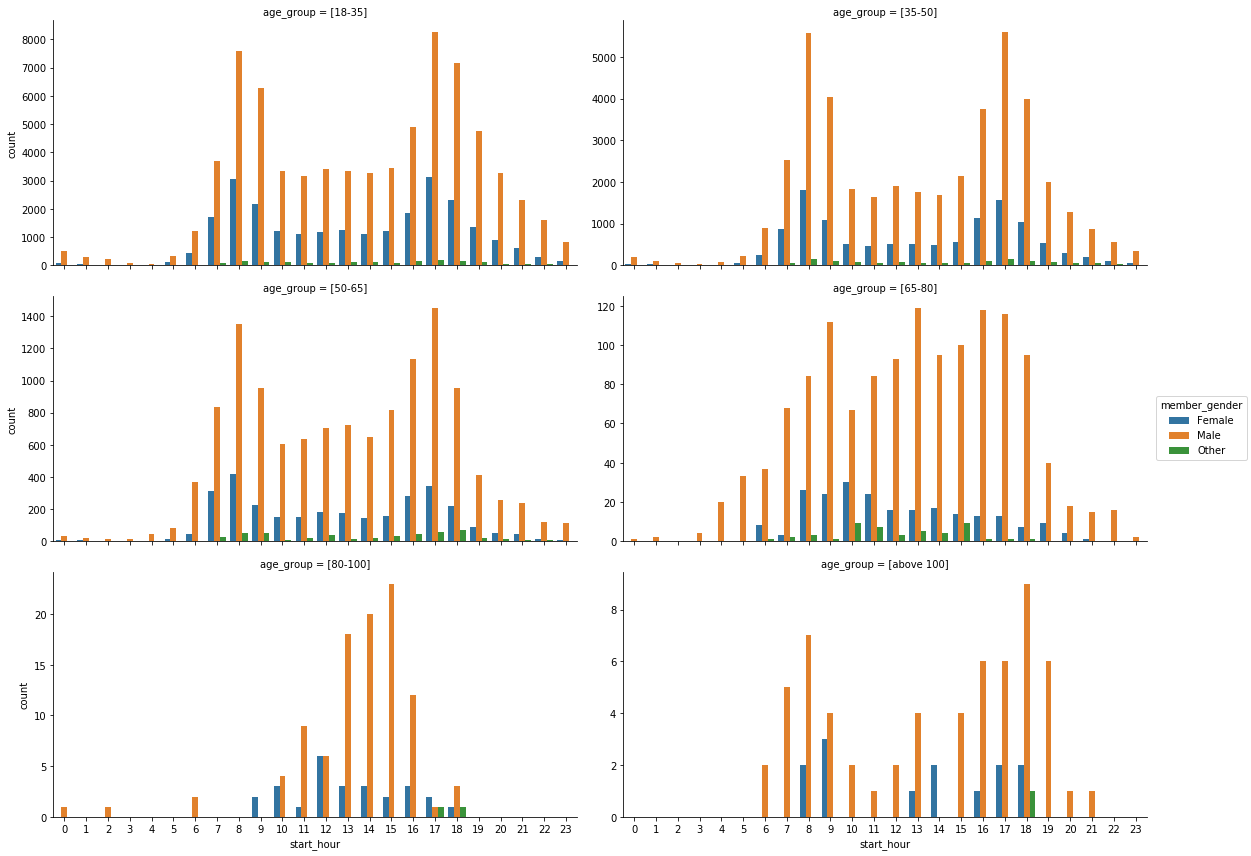

In [53]:
 sb.factorplot(data=df ,x='start_hour',col='age_group',hue='member_gender' ,sharey= False ,col_wrap= 2 ,aspect =2
              ,kind ='count' ,legend_out=True);

    - the first figure shows Hour of the trip for each age group Vs user type 
    - the second figure shows Hour of the trip for each age group Vs Gender 
    


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

    - Adult Males of ages [18-35] are the most frequent user from both user types ( subscriber - customer) 
    - Males peak hours in all user types categories is 8 am and 5 pm 
    - Females peak hours in all user types categories is 8 am and 5 pm 
    
    
### Were there any interesting or surprising interactions between features?

    - I don't think so because the numeric values here are discrete. 